In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv("iris.csv")

In [82]:
df.shape

(150, 6)

In [83]:
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [84]:
df.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [85]:
df.dtypes

Unnamed: 0        int64
Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [86]:
df.apply(lambda x:len(x.unique()))

Unnamed: 0      150
Sepal.Length     35
Sepal.Width      23
Petal.Length     43
Petal.Width      22
Species           3
dtype: int64

In [87]:
duplicate=df.duplicated()
print(duplicate.sum())

0


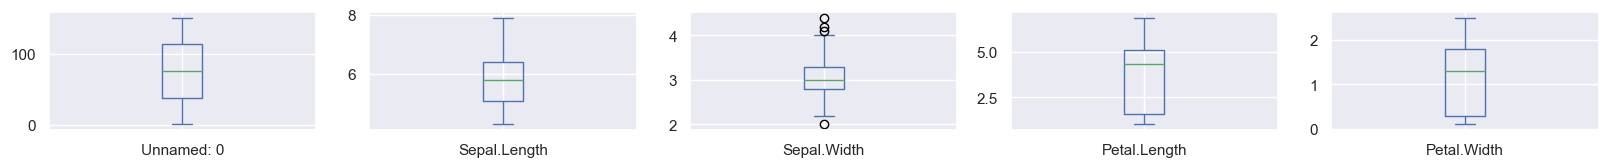

In [88]:
df.plot(kind='box', subplots=True, layout=(10,5), figsize=(20,18))
plt.show()

In [89]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the IQR for each numeric column
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
iqr = q3 - q1


def replace_outliers(df):
    for col in numeric_cols:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Replace outliers with the IQR
df = replace_outliers(df)

<function matplotlib.pyplot.show(close=None, block=None)>

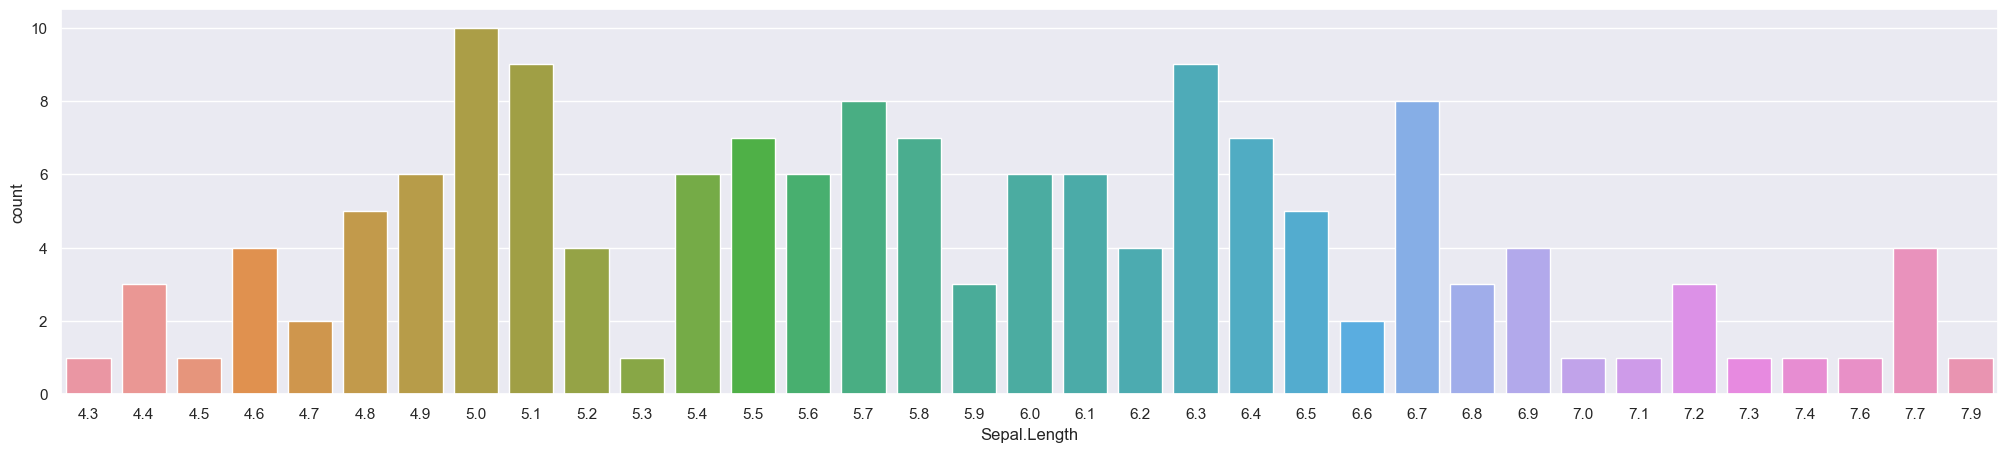

In [90]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="Sepal.Length")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

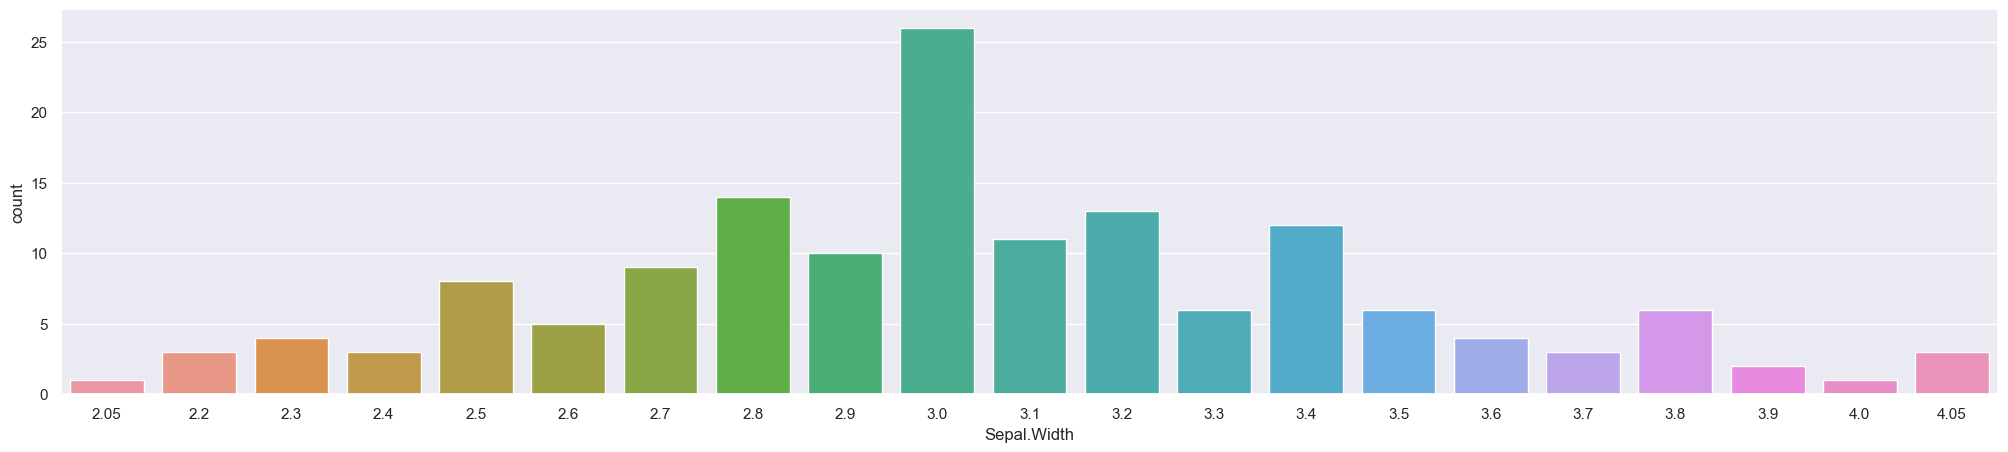

In [91]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="Sepal.Width")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

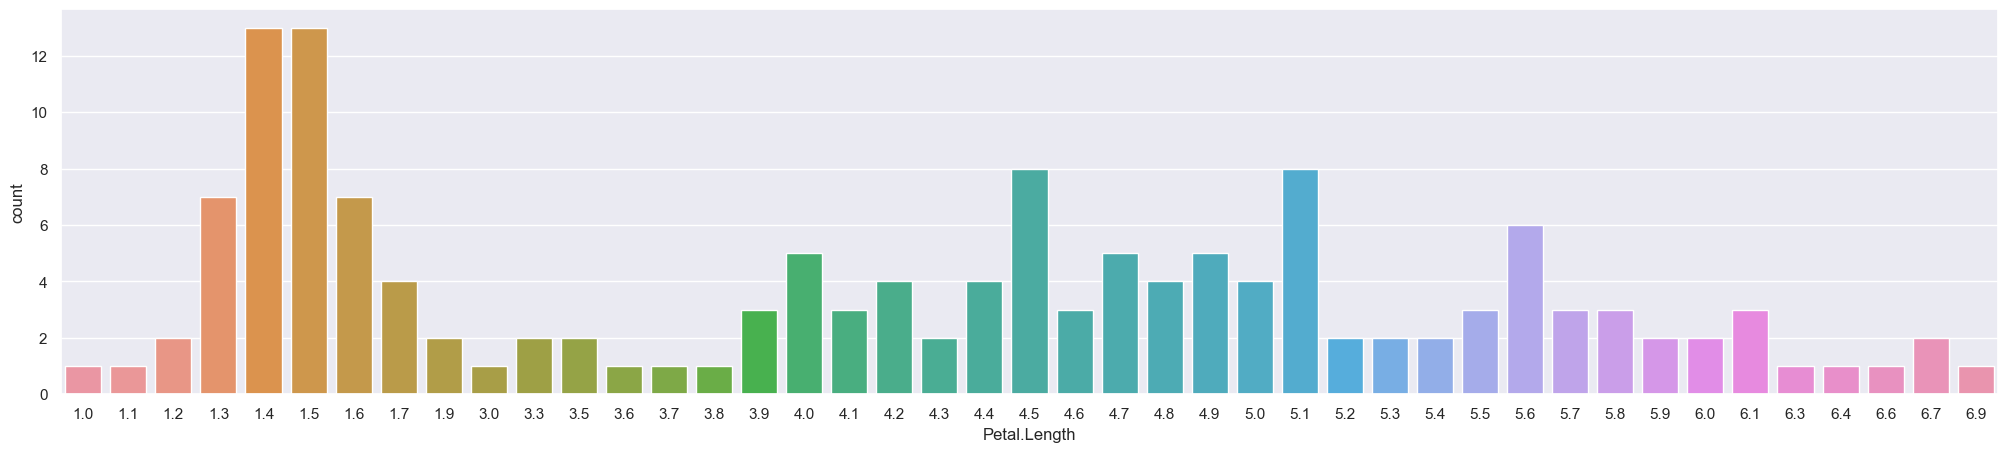

In [92]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="Petal.Length")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

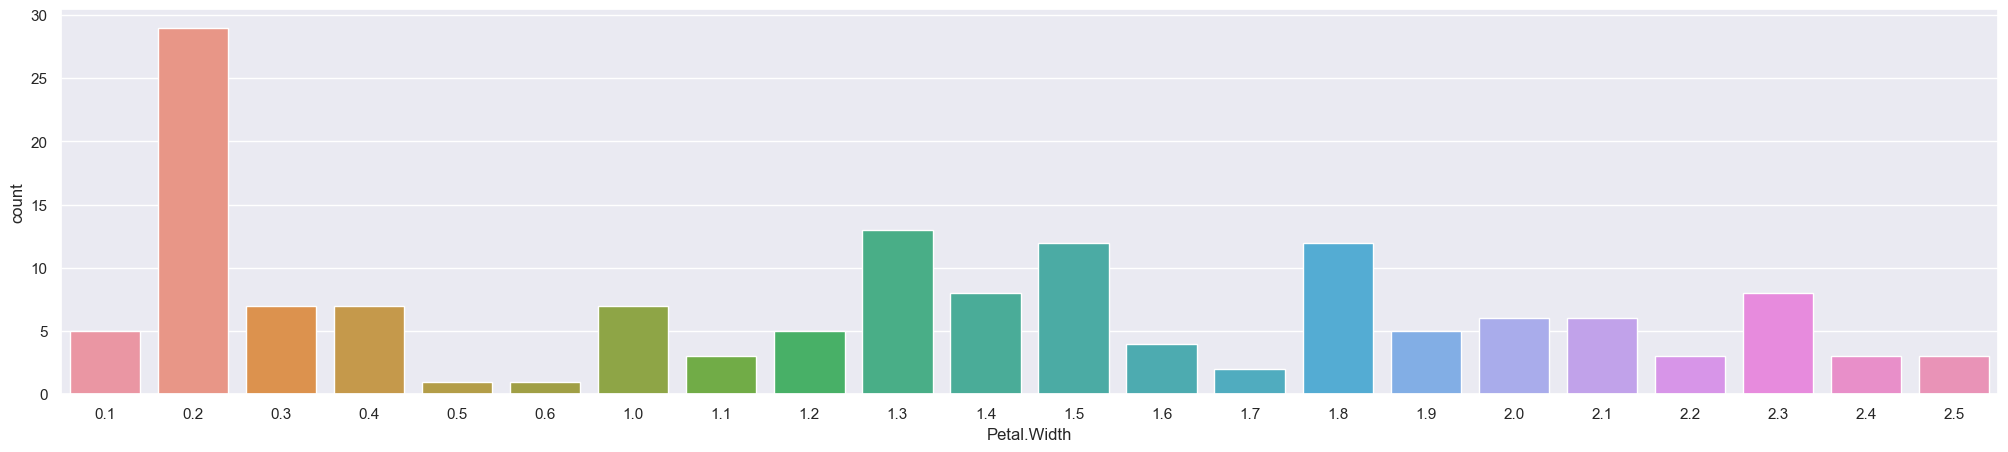

In [93]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="Petal.Width")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

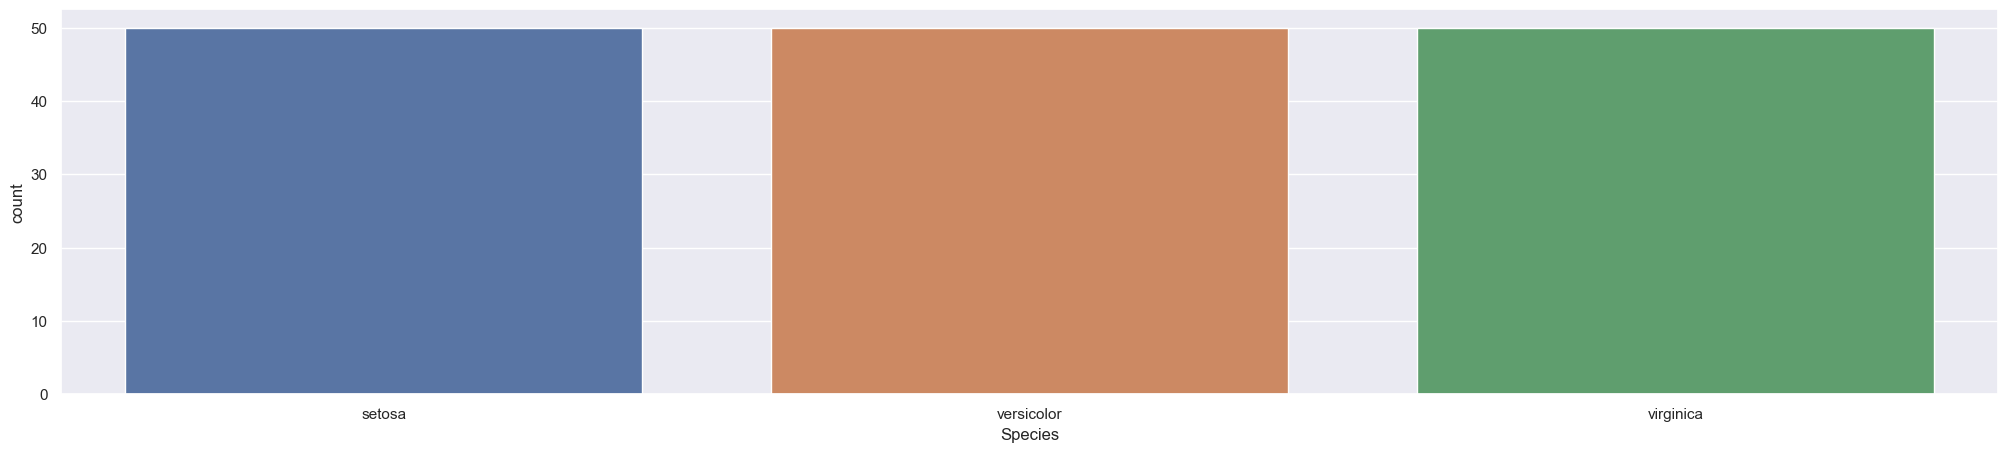

In [94]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="Species")
plt.show

In [95]:
ord_enc = OrdinalEncoder()
df["Species_code"] = ord_enc.fit_transform(df[["Species"]])
df[["Species", "Species_code"]].head(5)

,Species,Species_code
0,setosa,0.0
1,setosa,0.0
2,setosa,0.0
3,setosa,0.0
4,setosa,0.0


In [96]:
df=df.drop(['Species'],axis=1)

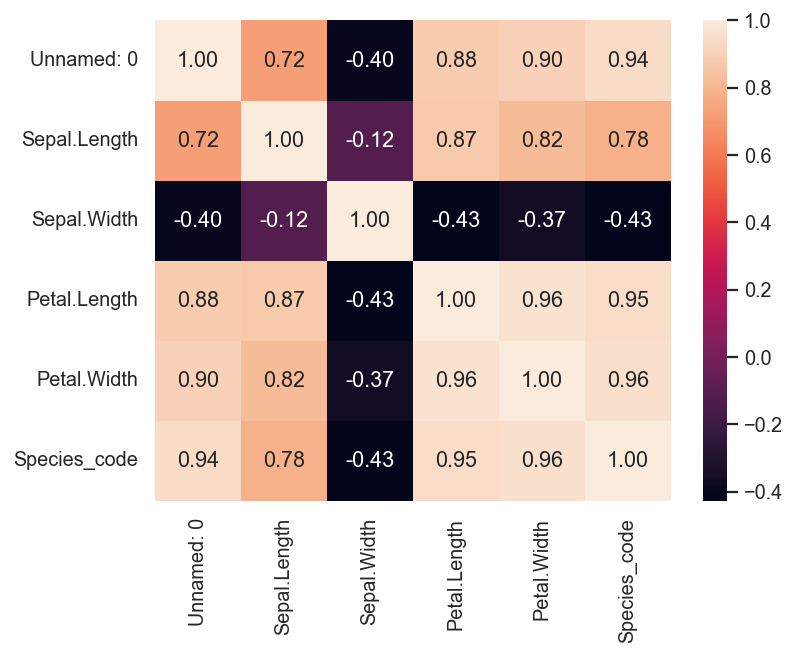

In [97]:
#plotting the correlation matrix
corr = df.corr()
 
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

In [98]:
df=df.drop(['Sepal.Width'],axis=1)

In [99]:
train_df=df[:150]
test_df=df[150:]
X = train_df.drop('Species_code', axis=1)
y = train_df['Species_code']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size = 0.2,random_state=200)
print(" X_train dataset: ", X_train_df.shape)
print(" y_train dataset: ", y_train_df.shape)
print(" X_test dataset: ", X_test_df.shape)
print(" y_test dataset: ", y_test_df.shape)

 X_train dataset:  (120, 4)
 y_train dataset:  (120,)
 X_test dataset:  (30, 4)
 y_test dataset:  (30,)


In [100]:
LR = linear_model.LinearRegression()
LR.fit(X_train_df,y_train_df)
LinearRegression()
pred = LR.predict(X_test_df)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test_df,pred))

print('MEAN SQUARED ERROR :', mean_squared_error(y_test_df,pred))

MEAN ABSOLUTE ERROR : 0.11068043207213238
MEAN SQUARED ERROR : 0.020112841133917515


In [101]:
models = [LinearRegression()]
scores = []

for model in models:
   
    model.fit(X_train_df, y_train_df)
    predicted = model.predict(X_test_df)
    scores.append({'Model': type(model).__name__, 'Scores' : model.score(X_test_df,y_test_df)})

Score_Train = pd.DataFrame(scores)

print(Score_Train)

              Model    Scores
0  LinearRegression  0.969628


In [102]:
print (model.score(X_train_df, y_train_df))
print(model.score(X_test_df, y_test_df))

0.9545627430875977
0.9696282600326749


In [103]:
from sklearn.metrics import r2_score

max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train_df, y_train_df)
    pred = lr.predict(x_test_df)
    r2 = r2_score(y_test_df, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.9786193040307983 on Random State 472
